![VocalPy logo](./images/vocalpy-primary.png)
# VocalPy 🐍 💬 in 15 minutes ⏲️

This tutorial will introduce you to VocalPy, a core Python package for acoustic communication research.

## Set up

In [ ]:
First we download some example data.

In [1]:
!curl -sSL https://raw.githubusercontent.com/vocalpy/vak/main/src/scripts/download_autoannotate_data.py | python3 -

...100%, 116 MB, 13966 KB/s, 8 seconds passed

...100%, 77 MB, 10549 KB/s, 7 seconds passed


unpacking: /home/pimienta/Documents/repos/coding/vocalpy/vocalpy-notebooks/bfsongrepo/tars/sober.repo1.gy6or6.032212.wav.csv.tar.gz

unpacking: /home/pimienta/Documents/repos/coding/vocalpy/vocalpy-notebooks/bfsongrepo/tars/sober.repo1.gy6or6.032312.wav.csv.tar.gz


In [ ]:
!curl -L https://osf.io/3fzye/download -o generated_test_data.tar.gz

In [ ]:
!tar -xvzf generated_test_data.tar.gz

And then we'll move that data into a `./data` directory.

In [2]:
!mv bfsongrepo data

In [ ]:
!mv tests/data-for-tests/generated data/generated-vocalpy-test-data

Now that we've got some data to work with, we can import `vocalpy`

In [1]:
import vocalpy as voc

## Data types for acoustic communication

Let's look at the data types that VocalPy provides for acoustic comunication.

We load all the wav files from a directory using a convenience function that VocalPy gives us in its `paths`, `vocalpy.paths.from_dir`:

In [2]:
data_dir = ('data/bfsongrepo/gy6or6/032312/')

wav_paths = voc.paths.from_dir(data_dir, 'wav')

### Data type for audio: `vocalpy.Audio`

Next we load all the wav files into the data type that VocalPy provides for audio, `vocalpy.Audio`, using the method `vocalpy.Audio.read`:

In [3]:
audios = [
    voc.Audio.read(wav_path) for wav_path in wav_paths
]

Let's inspect one of the `vocalpy.Audio` instances

In [4]:
an_audio = audios[0]
print(an_audio)

vocalpy.Audio(data=array([-0.007...  0.00079346]), samplerate=32000, channels=1), path=data/bfsongrepo/gy6or6/032312/gy6or6_baseline_230312_0808.138.wav)


We can see that it has four attributes:

1. `data`, the audio signal itself

In [5]:
print(an_audio.data)

[-0.00701904 -0.00680542 -0.00717163 ...  0.0010376   0.00109863
  0.00079346]


2. `samplerate`, the sampling rate for the audio

In [6]:
print(an_audio.samplerate)

32000


3. `channels`, the number of channels

In [7]:
print(an_audio.channels)

1


and finally,  

4. `path`, the path to the file that the audio was read from

In [8]:
print(an_audio.path)

data/bfsongrepo/gy6or6/032312/gy6or6_baseline_230312_0808.138.wav


One of the reasons VocalPy provides this data type, and the others we're about to show you here, is that it helps you write more succinct code that's easier to read: for you, when you come back to your code months from now, and for others that want to read the code you share.

## Classes for steps in pipelines for processing data in acoustic communication

In addition to data types for acoustic communication, VocalPy provides you with classes that represent steps in pipelines for processing that data. These classes are also written with readability and reproducibility in mind.

Lets use one of those classes, `SpectrogramMaker`, to make a spectrogram from each one of the wav files that we loaded above.

We'll write a brief snippet to do so, and then we'll explain what we did.

In [9]:
spect_params = {'fft_size': 512, 'step_size': 64}
callback = voc.signal.spectrogram.spectrogram
spect_maker = voc.SpectrogramMaker(callback=callback, spect_params=spect_params)
spects = spect_maker.make(audios, parallelize=True)

[########################################] | 100% Completed | 103.89 ms


Notice a couple of things about this snippet:
- In line 1, you declare the parameters that you use to generate spectrograms explicitly, as a dictionary. This helps with reproducibility by encouraging you to document those parameters
- In line 2, you also decide what code you will use to generate the spectrograms, by using what's called a "callback", because the `SpectrogramMaker` will call this function for you.
- In line 3, you create an instance of the `SpectrogramMaker` class with the function you want to use to generate spectrograms, and the parameters to use with that function.
- In line 4, you make the spectrograms, with a single call to the method `vocalpy.SpectrogramMaker.make`. You pass in the audio we loaded earlier, and you tell VocalPy that you want to parallelize the generation of the spectrograms. This is done for you, using the library `dask`.

### Data type: `vocalpy.Spectrogram`

As you might have guessed, when we call `SpectrogramMaker.make`, we get back a list of spectrograms.

This is the next data type we'll look at. 

In [44]:

a_spect = spects[0]

In [25]:
spects = [
    voc.Spectrogram.read(spect_path)
    for spect_path in spect_paths
]

We inspect the first spectrogram we loaded.

In [27]:
a_spect = spects[0]
print(a_spect)

vocalpy.Spectrogram(data=array([[3.463...7970774e-14]]), frequencies=array([    0....7.5, 16000. ]), times=array([0.008,...7.648, 7.65 ]), path=PosixPath('data/generated-vocalpy-test-data/spect_npz/0.wav.npz'), audio_path=None)


As before, we'll walk through the attributes of this class.
But since the whole point of a spectrogram is to let us see sound, let's actually look at the spectrogram, instead of staring at arrays of numbers.

We'll make a new spectrogram where we log transform the data so it's easier to visualize.

We import NumPy so we can do a quick-and-dirty transform.

In [34]:
import numpy as np

In [35]:
a_spect_log = voc.Spectrogram(data=np.log(a_spect.data),
                              frequencies=a_spect.frequencies,
                              times=a_spect.times)

Then we'll plot the log-transformed spectrogram using a function built into the `vocalpy.plot` module.

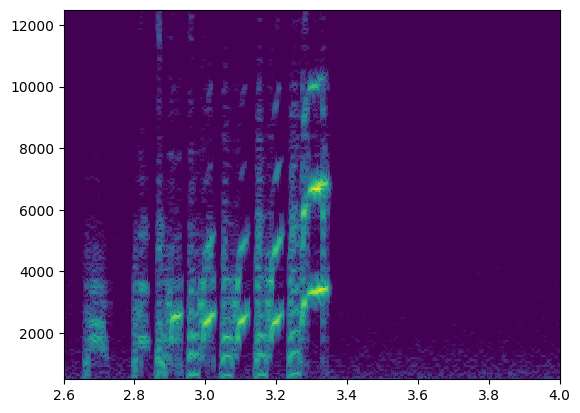

In [37]:
voc.plot.spectrogram(
    a_spect_log,
    tlim = [2.6, 4],
    flim=[500,12500],
    pcolormesh_kwargs={'vmin':-25, 'vmax': -10}
)

We see that we have a spectrogram of Bengalese finch song.

Now that we know what we're working with, let's actually inspect the attributes of the `vocalpy.Spectrogram` instance.

There are five attributes we care about here.

1. `data`: this is the spectrogram itself -- as with the other data types, the attribute `data` like `vocalpy.Audio`, the name `data` indiciates this main data we care about

In [38]:
print(a_spect.data)

[[3.46304505e-11 3.21358889e-10 1.69776114e-10 ... 2.52280281e-12
  3.95650392e-10 1.06044062e-10]
 [6.58031211e-09 8.96727218e-09 7.69321435e-09 ... 3.09521670e-09
  2.89244492e-09 4.51070926e-09]
 [1.91941428e-09 4.41517483e-10 6.51689265e-10 ... 7.60201448e-10
  5.52998788e-10 1.49051028e-09]
 ...
 [9.84343049e-15 1.82055237e-14 2.63338063e-15 ... 1.95627916e-13
  3.89716842e-13 2.73694995e-13]
 [8.20831097e-14 1.54801063e-13 1.49255672e-13 ... 5.01410278e-14
  5.06381473e-14 8.39771439e-14]
 [1.03632468e-15 3.68508345e-15 1.97011970e-14 ... 1.44634285e-14
  1.93588816e-14 4.27970774e-14]]


Let's look at the shape of `data`. It's really just a NumPy array, so we inspect the array's `shape` attribute.

In [40]:
print(a_spect.data.shape)

(257, 3822)


We see that we have a matrix with 257 rows and 3822 columns. These correspond to the next two attributes we will look at.

2. `frequencies`, a vector of the number of frequency bins

Just like with the `Audio` class, VocalPy gives us the ability to conveniently read and write spectrograms from files. This saves us from generating spectrograms over and over. Computing spectrograms can be computionally expensive, if your audio has a high sampling rate or you are using methods like multi-taper spectrograms. Saving spectrograms from files also makes it easier for you to share your data in the exact form you used it, so that it's easier to replicate your analyses.

To see this in action, let's write our spectrograms to files.

We load a set of pre-computed spectrograms from one of the datasets we downloaded earlier. Notice that the extension is `'npz'`; this is a file format that NumPy uses to save mulitple arrays in a single file. By convention we include the file extension of the source audio, so that the file name ends with `'.wav.npz'`.

We can confirm that reading and writing spectrograms to disk works as we expect using the method `vocalpy.Spectrogram.read`m

In [ ]:
spect_data_dir = ('data/generated-vocalpy-test-data/spect_npz/')

spect_paths = voc.paths.from_dir(spect_data_dir, 'wav.npz')

### Data type: `vocalpy.Annotation`

In [8]:
import vocalpy as voc

data_dir = ('tests/data-for-tests/source/'
            'audio_cbin_annot_notmat/gy6or6/032312/')

notmat_paths = voc.paths.from_dir(data_dir, '.not.mat')
annots = [voc.Annotation.read(notmat_path, format='notmat') 
          for notmat_path in notmat_paths]
print(annots[1])

Annotation(data=Annotation(annot_path=PosixPath('tests/data-for-tests/source/audio_cbin_annot_notmat/gy6or6/032312/gy6or6_baseline_230312_0809.141.cbin.not.mat'), notated_path=PosixPath('tests/data-for-tests/source/audio_cbin_annot_notmat/gy6or6/032312/gy6or6_baseline_230312_0809.141.cbin'), seq=<Sequence with 57 segments>), path=PosixPath('tests/data-for-tests/source/audio_cbin_annot_notmat/gy6or6/032312/gy6or6_baseline_230312_0809.141.cbin.not.mat'))


(<Figure size 640x480 with 2 Axes>, <Axes: >, <Axes: >)

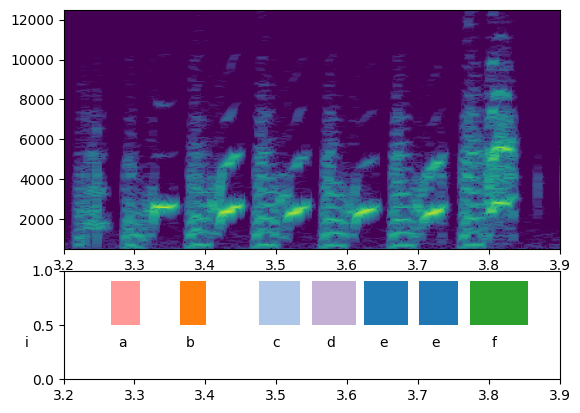

In [9]:
voc.plot.annotated_spectrogram(
    spect=voc.Spectrogram(data=np.log(spects[1].data),
                    frequencies=spects[1].frequencies,
                    times=spects[1].times),
    annot=annots[1],
    tlim = [3.2, 3.9],
    flim=[500,12500],
    imshow_kwargs={'vmin':-25, 'vmax': -10}
)

In [10]:
import evfuncs
import vocalpy as voc

data_dir = ('tests/data-for-tests/source/'
            'audio_cbin_annot_notmat/gy6or6/032312/')

cbin_paths = voc.paths.from_dir(data_dir, 'cbin')
audios = [voc.Audio.read(cbin_path) for cbin_path in cbin_paths]


segment_params = {
    'threshold': 1500,
    'min_syl_dur': 0.01,
    'min_silent_dur': 0.006,
}
segmenter = voc.Segmenter(
    # example of using a callback from another library
    callback=evfuncs.segment_song, 
    segment_params=segment_params
)

In [11]:
seqs = segmenter.segment(audios, parallelize=True)

print(seqs[1])

[########################################] | 100% Completed | 122.91 ms
Sequence(units=[Unit(onset=2.19075, offset=2.20428125, label='-', audio=None, spectrogram=None), Unit(onset=2.35478125, offset=2.38815625, label='-', audio=None, spectrogram=None), Unit(onset=2.8410625, offset=2.86715625, label='-', audio=None, spectrogram=None), Unit(onset=3.48234375, offset=3.49371875, label='-', audio=None, spectrogram=None), Unit(onset=3.57021875, offset=3.60296875, label='-', audio=None, spectrogram=None), Unit(onset=3.64403125, offset=3.67721875, label='-', audio=None, spectrogram=None), Unit(onset=3.72228125, offset=3.74478125, label='-', audio=None, spectrogram=None), Unit(onset=3.8036875, offset=3.8158125, label='-', audio=None, spectrogram=None), Unit(onset=3.82328125, offset=3.83646875, label='-', audio=None, spectrogram=None), Unit(onset=4.13759375, offset=4.16346875, label='-', audio=None, spectrogram=None), Unit(onset=4.80278125, offset=4.814, label='-', audio=None, spectrogram=None),